In [130]:
import pandas as pd
from matplotlib import pyplot as plt

In [131]:
df = pd.read_csv("shoe_sales.csv")
df.head()


,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [132]:
df.shape

(60, 3)

In [133]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


### Nike Analysis

In [134]:
df_nike = df[df["brand"] == "Nike"]
df_nike.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
2,9/2/2023,Nike,21.0
4,9/3/2023,Nike,18.0
6,9/4/2023,Nike,22.0
8,9/5/2023,Nike,20.0


In [135]:
df_nike.shape

(30, 3)

In [136]:
df_nike.describe()

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


In [137]:
round(df_nike.sold_qty.median())

20

In [138]:
#look at null values
df_nike[df_nike.sold_qty.isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [139]:
#replace null values now
df_nike.fillna({
    "sold_qty": round(df_nike.sold_qty.median())
}, inplace= True)

/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_48757/2144787513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike.fillna({


In [140]:
df_nike[df_nike.sold_qty.isnull()]

,date,brand,sold_qty


In [141]:
df_nike.loc[[32,48]]

,date,brand,sold_qty
32,9/17/2023,Nike,20.0
48,9/25/2023,Nike,20.0


### Adidas Analysis


In [142]:
df_adidas = df[df["brand"] == "Adidas"]
df_adidas.head()

,date,brand,sold_qty
1,9/1/2023,Adidas,14.0
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
7,9/4/2023,Adidas,13.0
9,9/5/2023,Adidas,10.0


In [143]:
df_adidas.shape

(30, 3)

In [144]:
df_adidas.describe()

#looks like an outlier in df. see max value

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [145]:
round(df_adidas.sold_qty.median())

12

In [146]:
df_adidas.sold_qty.quantile([0.95])
#95 % of values are less than 18.55

0.95    18.55
Name: sold_qty, dtype: float64

In [147]:
df_adidas[df_adidas.sold_qty > 18.55]

#clearly 689 is an outlier

,date,brand,sold_qty
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0


In [148]:
def plot_sold_qty():
    dates = df_nike["date"]
    plt.figure(figsize=(15,6))
    plt.plot(dates, df_adidas['sold_qty'], label = "Adidas", color = "blue")
    plt.plot(dates, df_nike['sold_qty'], label = "Nike", color = "red")
    
    # Customize the plot
    plt.title('Sold Quantities Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sold Quantity')
    plt.grid(True)
    plt.legend(title='Brand')
    plt.xticks(rotation = 45)

    # Show the plot
    plt.show()

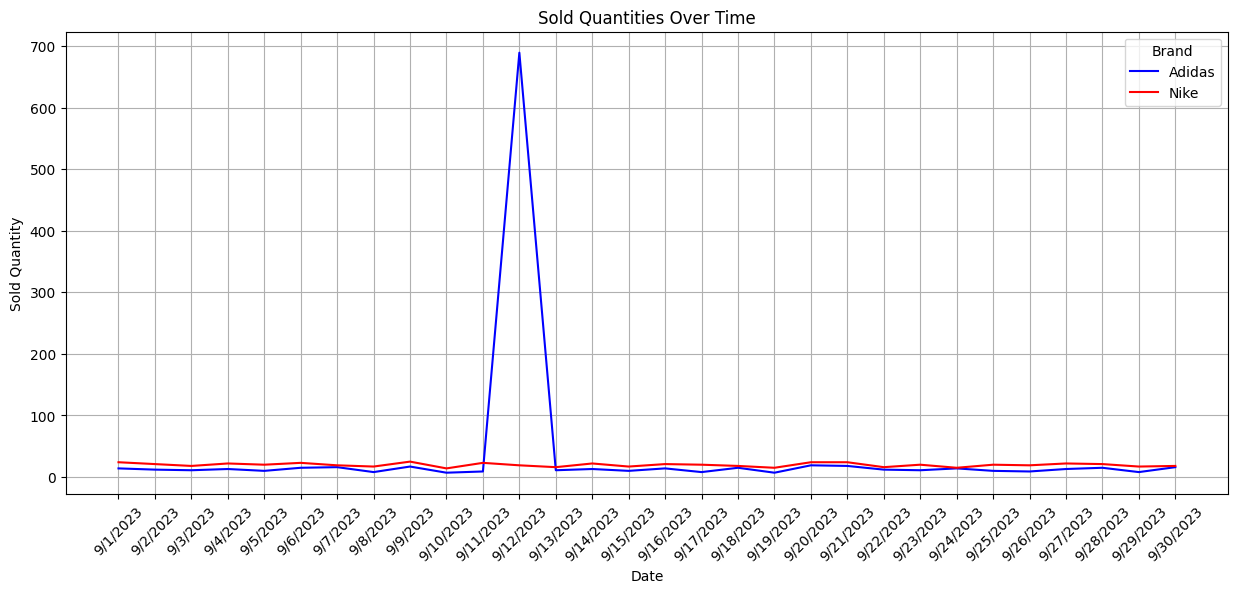

In [149]:
plot_sold_qty()

In [150]:
df_adidas.sold_qty.replace(689, df_adidas.sold_qty.median(), inplace= True )
df_adidas

/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_48757/1546016273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_adidas.sold_qty.replace(689, df_adidas.sold_qty.median(), inplace= True )
/var/folders/mp/wmd86wys0dl717863td1mhq40000gn/T/ipykernel_48757/1546016273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adidas.so

,date,brand,sold_qty
1,9/1/2023,Adidas,14.0
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
7,9/4/2023,Adidas,13.0
9,9/5/2023,Adidas,10.0
11,9/6/2023,Adidas,15.0
13,9/7/2023,Adidas,16.0
15,9/8/2023,Adidas,8.0
17,9/9/2023,Adidas,17.0
19,9/10/2023,Adidas,7.0


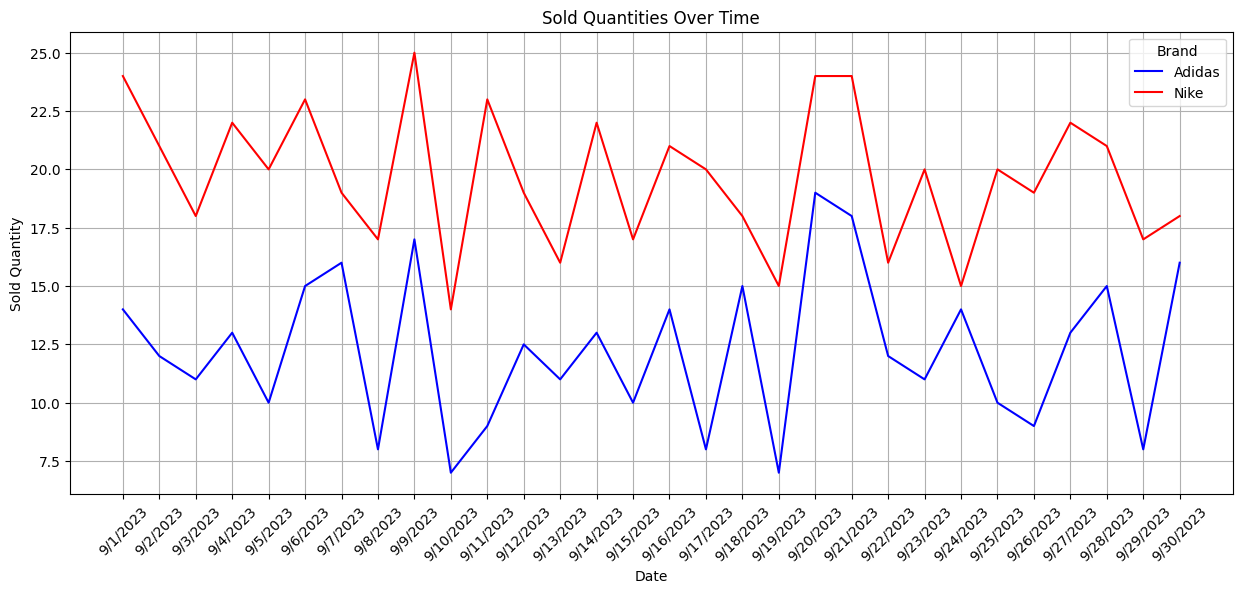

In [151]:
plot_sold_qty()